In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib
import urllib
import seaborn as sns

In [27]:
# url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
# urllib.request.urlretrieve(url, 'data/full_data.csv')

In [28]:
cvd = pd.read_csv('data/full_data.csv')
cvd['date'] = pd.to_datetime(cvd['date'])

In [29]:
cvd.isnull().sum()

iso_code                                        0
continent                                   15470
location                                        0
date                                            0
total_cases                                 37334
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       314176
excess_mortality_cumulative                314176
excess_mortality                           314176
excess_mortality_cumulative_per_million    314176
Length: 67, dtype: int64

In [30]:
# select all countries except China
cvd_no_china = cvd.loc[~(cvd['location'].isin(['China', 'World']))]
cvd_no_china.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [31]:
cvd_noChina_grouped = cvd_no_china.groupby(['location', 'date'])['total_cases', 'total_deaths'].sum().reset_index()

/tmp/ipykernel_5540/4122882168.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cvd_noChina_grouped = cvd_no_china.groupby(['location', 'date'])['total_cases', 'total_deaths'].sum().reset_index()


In [40]:
def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1,figsize = (4*size, 4))
    df = df.sort_values([value], ascending = False).reset_index(drop=True)
    g = sns.barplot(df[0:10], x=feature, y=value)
    g.set_title("Number of {} highest 10 value".format(title))
    plt.show()
    

In [41]:
filtered_cvd = cvd_noChina_grouped.sort_values(by=['location', 'date'], ascending=False)
filtered_cvd = filtered_cvd.drop_duplicates(subset=['location'], keep='first')


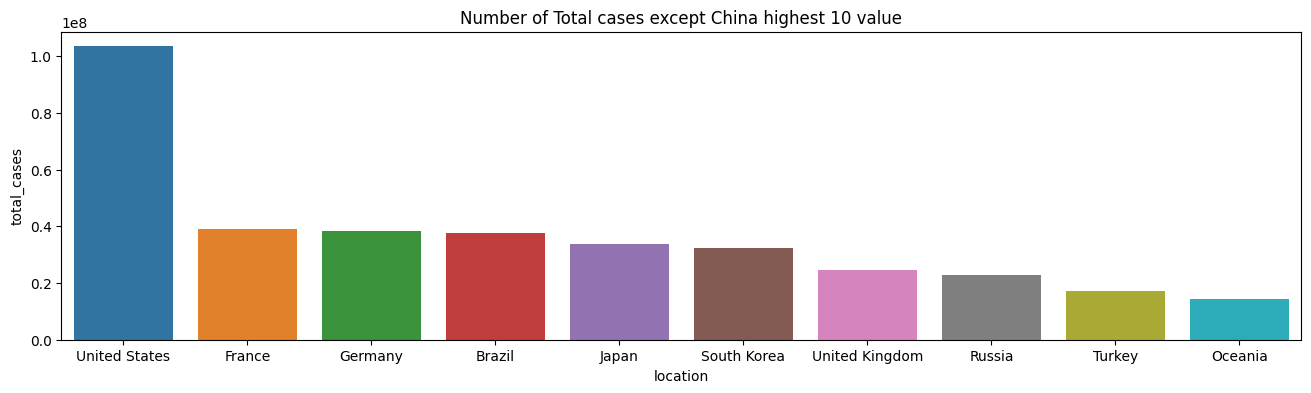

In [42]:
plot_bar('location', 'total_cases', 'Total cases except China', filtered_cvd, 4)

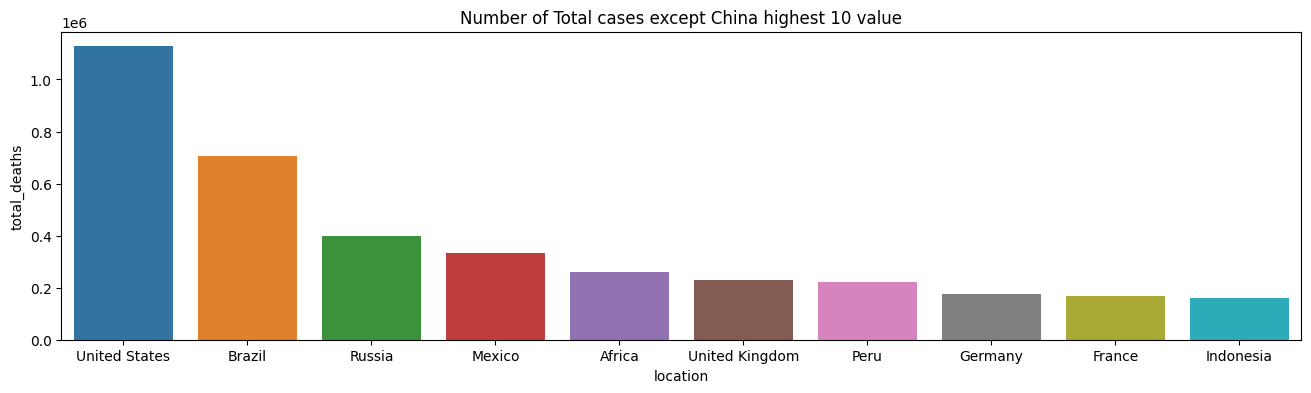

In [43]:
plot_bar('location', 'total_deaths', 'Total cases except China', filtered_cvd, 4)